In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Load dataset
url = "https://huggingface.co/datasets/nprak26/remote-worker-productivity/resolve/main/remote_work_productivity.csv?download=true"
df = pd.read_csv(url)


In [3]:
#Drop ID column
df.drop(columns=["Employee_ID"], inplace=True)

In [4]:
# Handle missing values first
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [5]:
#Convert categorical to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [6]:
#Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

In [7]:
#Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [8]:
#Convert to DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])


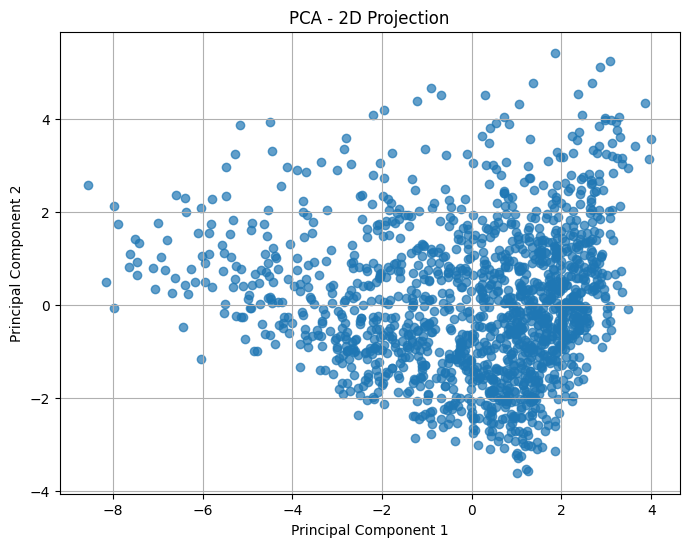

In [10]:
#Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7)
plt.title("PCA - 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()